# Project: Predict Housing Prices

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### 1.CRIM: per capita crime rate by town
##### 2.ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
##### 3.INDUS: proportion of non-retail business acres per town
##### 4.CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
##### 5.NOX: nitric oxides concentration (parts per 10 million)
##### 6.RM: average number of rooms per dwelling
##### 7.AGE: proportion of owner-occupied units built prior to 1940
##### 8.DIS: weighted distances to five Boston employment centres
##### 9.RAD: index of accessibility to radial highways
##### 10.TAX: full-value property-tax rate per 10,000
##### 11.PTRATIO: pupilteacher ratio by town
##### 12.B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
##### 13.LSTAT:  lower status of the population
##### 14.MEDV: Median value of owner-occupied homes in 1000's

# Load Boston Dataset


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Check for any missing values


In [3]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Data Exploration

In [4]:
X=bos.drop('PRICE',axis=1)
y=bos['PRICE']


In [5]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
#  Minimum price of the data
minimum_price = np.array(y).min()

#  Maximum price of the data
maximum_price = np.array(y).max()

#  Mean price of the data
mean_price = np.array(y).mean()

# Median price of the data
median_price  =np.median(y)

#  Standard deviation of prices of the data
std_price = np.array(y).std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110677
Median price $21.2
Standard deviation of prices: $9.188011545278203


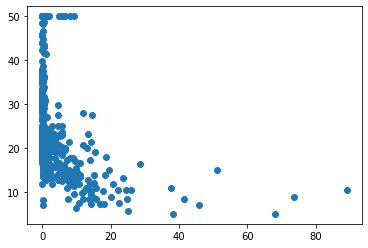

In [7]:
plt.scatter(bos['CRIM'],y)

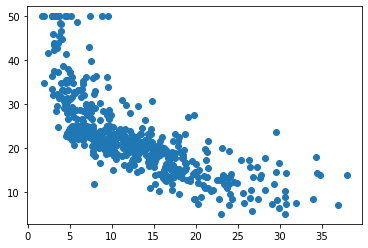

In [8]:
plt.scatter(bos['LSTAT'],y)

# Splitting our data into training and testing 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

In [10]:
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
def fit_model(X, y):
    
    cv_sets=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    
    regressor = DecisionTreeRegressor(random_state=0)

    
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_leaf':[1,2,3,4,5,6.5,7,8,9,10], 'min_samples_split':[1,2,3,4,5,6,7,8,9,10]} 
    scoring_fnc = make_scorer(r2_score)
    grid = GridSearchCV(estimator=regressor, param_grid= params, scoring=scoring_fnc,cv=cv_sets)
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
y_pr = reg.predict(X_test)
y_pred = reg.predict(X_train)
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(reg.get_params()['min_samples_leaf']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(reg.get_params()['min_samples_split']))

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 233, in fit
    % self.min_samples_leaf)
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 6.5

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test par

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 1256, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit fai

Parameter 'max_depth' is 7 for the optimal model.
Parameter 'min_samples_leaf' is 7 for the optimal model.
Parameter 'min_samples_split' is 2 for the optimal model.


C:\Users\Mohammed saad\.conda\envs\name\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.35914008 0.35914008 0.35914008 0.35914008 0.35914008
 0.35914008 0.35914008 0.35914008 0.35914008        nan 0.35914008
 0.35914008 0.35914008 0.35914008 0.35914008 0.35914008 0.35914008
 0.35914008 0.35914008        nan 0.35914008 0.35914008 0.35914008
 0.35914008 0.35914008 0.35914008 0.35914008 0.35914008 0.35914008
        nan 0.35914008 0.35914008 0.35914008 0.35914008 0.35914008
 0.35914008 0.35914008 0.35914008 0.35914008        nan 0.35914008
 0.35914008 0.35914008 0.35914008 0.35914008 0.35914008 0.35914008
 0.35914008 0.35914008        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.35914008 0.35914008 0.35914008 0.35914008 0.35914008
 0.35914008 0.35914008 0.35914008 0.35914008        nan 0.35914008
 0.35914008 0.35914008 0.35914008 0.35

In [12]:
R2_for_train = r2_score(y_train, y_pred)
R2_for_test = r2_score(y_test, y_pr)


## show R2_for_train and R2_for_test

In [13]:
print('R2_for_train',R2_for_train)
print('R2_for_test',R2_for_test)

R2_for_train 0.8684218446380422
R2_for_test 0.783067340836966


### I found that using decision tree is a weak model, so I used another model (adaboost)

## adaboost

In [11]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
model = AdaBoostRegressor(learning_rate=0.1,n_estimators=500,
                                  base_estimator = DecisionTreeRegressor(max_depth=7,min_samples_leaf=7),
                                  random_state=0)
model=model.fit(X_train,y_train)

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
from sklearn.metrics import r2_score
train_accuracy =r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)
print('The training r2 is', train_accuracy)
print('The test r2 is', test_accuracy)

The training r2 is 0.9771854843176992
The test r2 is 0.9103017766532873
